In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
import seaborn as sns

In [2]:
sc.settings.figdir="../result/10.30_lineage_draw/"

In [3]:
adata=sc.read("../../temp_data/10.27_dpt_sub.h5ad")

In [8]:
dptValue=adata.obs["palantir_norm"].values.copy()
dptLarge=dptValue[dptValue>0.3]
dptLarge=(dptLarge-0.3)/4 + 0.3
dptValue[dptValue>0.3]=dptLarge
adata.obs["palantir_norm_scale"]=dptValue

In [287]:
dptValue=adata.obs["palantir_norm"].values.copy()
dptLarge=dptValue[dptValue>0.6]
dptLarge=(dptLarge-0.6)/4 + 0.6
dptValue[dptValue>0.6]=dptLarge
adata.obs["palantir_norm_scale_2"]=dptValue

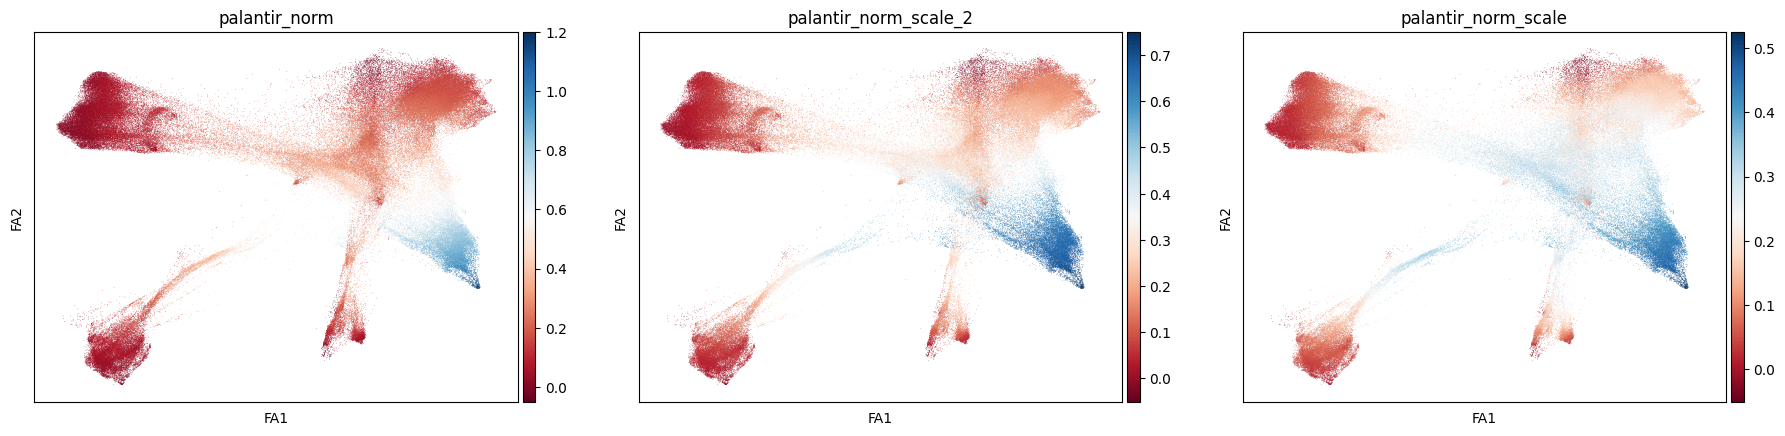

In [288]:
sc.pl.draw_graph(adata,color=["palantir_norm","palantir_norm_scale_2","palantir_norm_scale"],cmap="RdBu")

In [284]:
dpt=adata.obs["palantir_norm_scale"]
num_bins = 3
hist, bin_edges = np.histogram(dpt, bins=num_bins)
dpt_bin=np.digitize(dpt, bin_edges)
adata.obs["dpt_bin_test_0.3"]=dpt_bin.astype("str")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


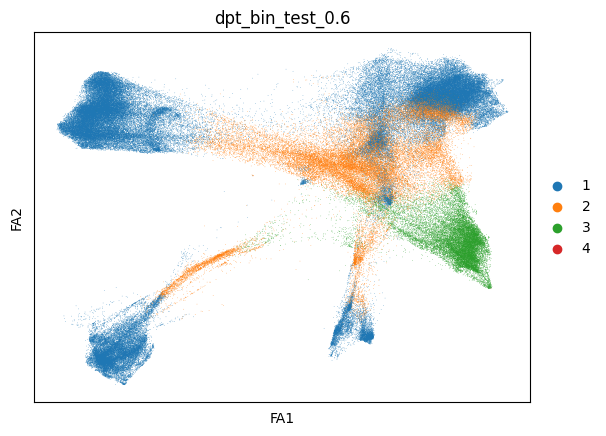

In [286]:
sc.pl.draw_graph(adata,color=["dpt_bin_test_0.6"],cmap="RdBu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


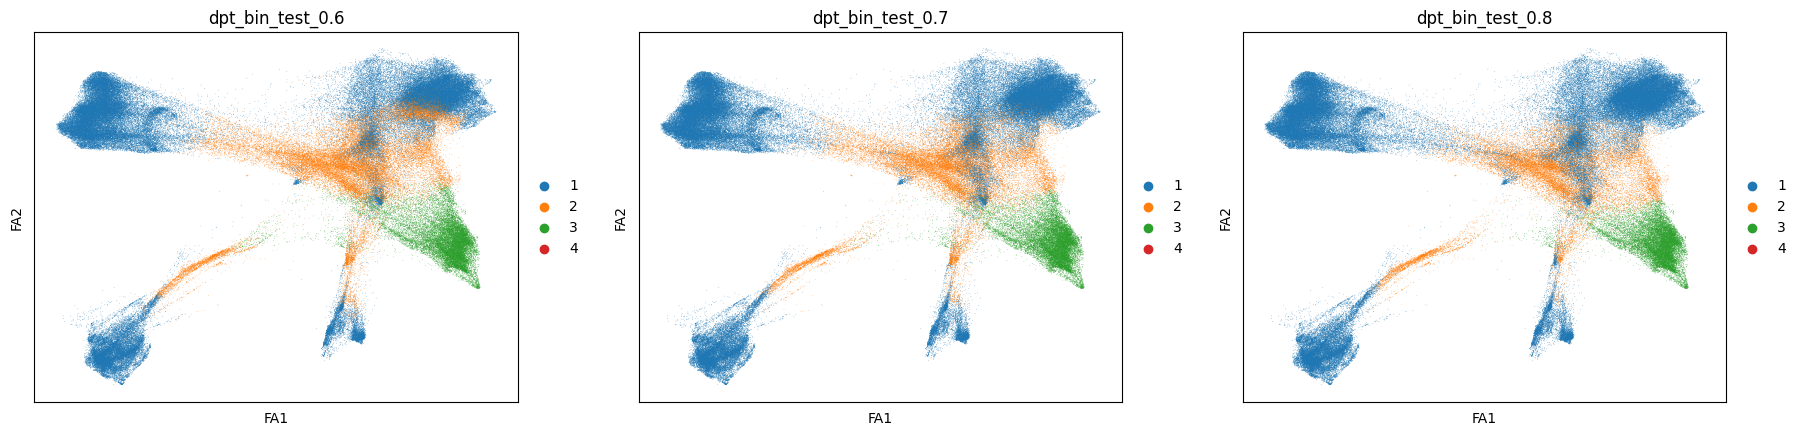

In [232]:
sc.pl.draw_graph(adata,color=["dpt_bin_test_0.6","dpt_bin_test_0.7","dpt_bin_test_0.8"],cmap="RdBu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


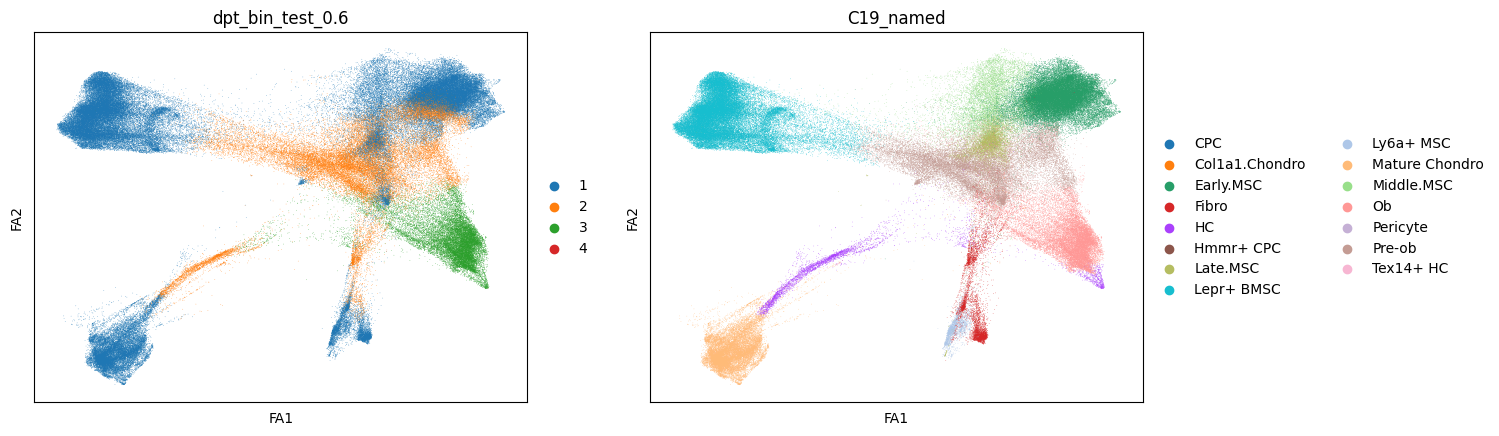

In [240]:
sc.pl.draw_graph(adata,color=["dpt_bin_test_0.6","C19_named"],cmap="RdBu",save="dpt_modify.pdf")

In [241]:
dpt=adata.obs["palantir_norm_scale_2"]
num_bins = 10
hist, bin_edges = np.histogram(dpt, bins=num_bins)
dpt_bin=np.digitize(dpt, bin_edges)
adata.obs["dpt_bin"]=dpt_bin.astype(str)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


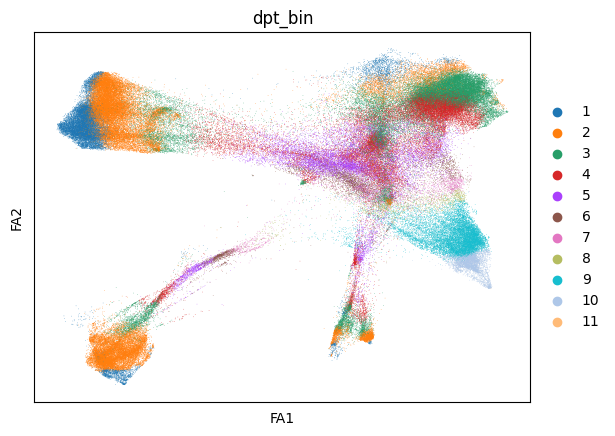

In [243]:
sc.pl.draw_graph(adata,color=["dpt_bin"],cmap="RdBu",save="dpt_10_bin.pdf")

In [74]:
lineage_meta=pd.read_csv("../../important_processed_data/10.29_slingshot_lineage_mod.csv",index_col=0)

In [80]:
dpt_lineage=lineage_meta.loc[adata.obs_names]
faLogic=dpt_lineage["lineage_laFibro"] & dpt_lineage["lineage_lepr"] & (adata.obs["C7_named"]!="Ob").astype("boolean")
adata.obs["test"]="La"
adata.obs["test"][faLogic]="Lepr"
dpt_lineage["lineage_laFibro"][faLogic]=False

/tmp/ipykernel_1468539/2907353134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["test"][faLogic]="Lepr"


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


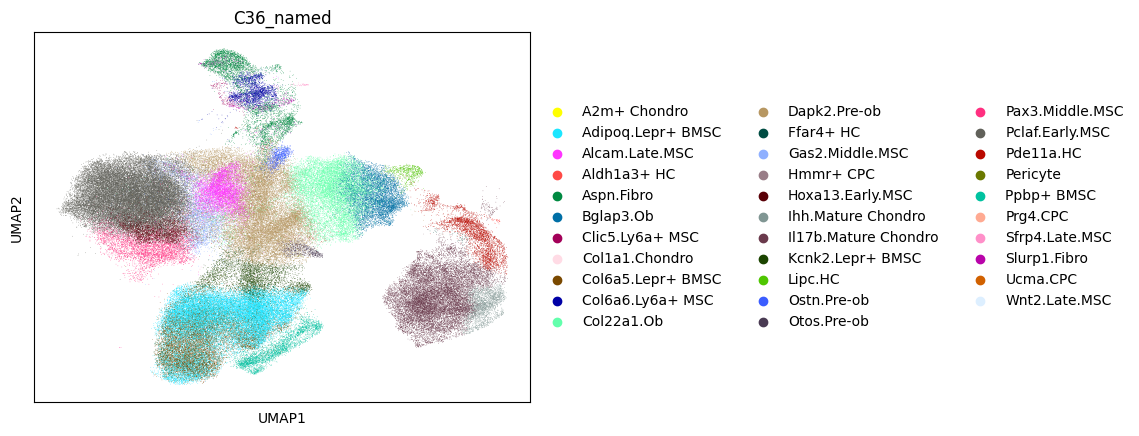

In [149]:
sc.pl.umap(adata,color="C36_named")

In [138]:
testLogic=dpt_lineage["lineage_laFibro"]& (adata.obs["C49_named"] in ["Angpt4.Dapk2.Pre-ob"]).astype("boolean")
testLogic=dpt_lineage["lineage_laFibro"]& (adata.obs["C36_named"]=="Otos.Pre-ob").astype("boolean")
adata.obs["test"]="La"
adata.obs["test"][testLogic]="Lepr"
dpt_lineage["lineage_laFibro"][testLogic]=False
dpt_lineage["lineage_lepr"][testLogic]=True

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


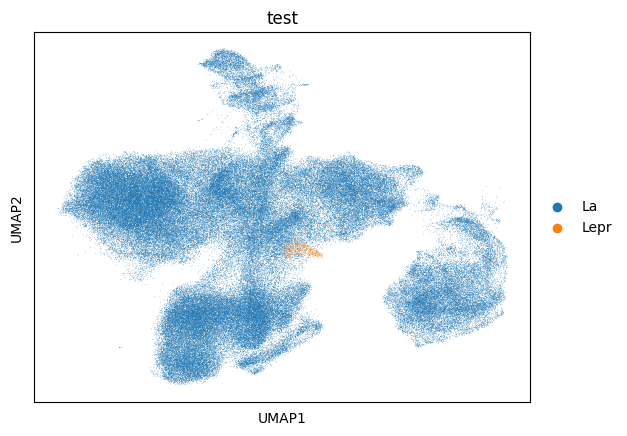

In [154]:
sc.pl.umap(adata,color="test")

In [158]:
adata.obs["lineage_laFibro"]=dpt_lineage["lineage_laFibro"].astype("str")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


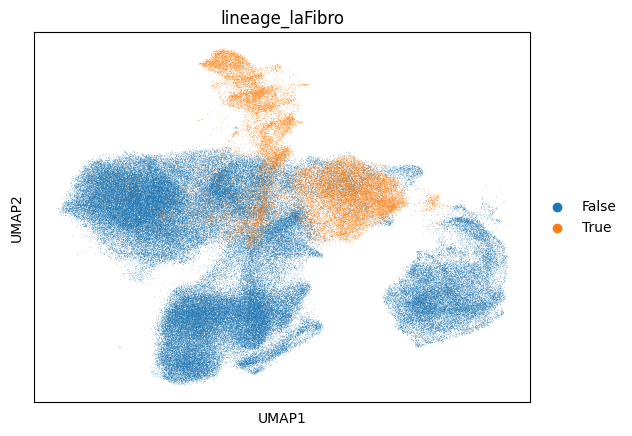

In [161]:
sc.pl.umap(adata,color="lineage_laFibro")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


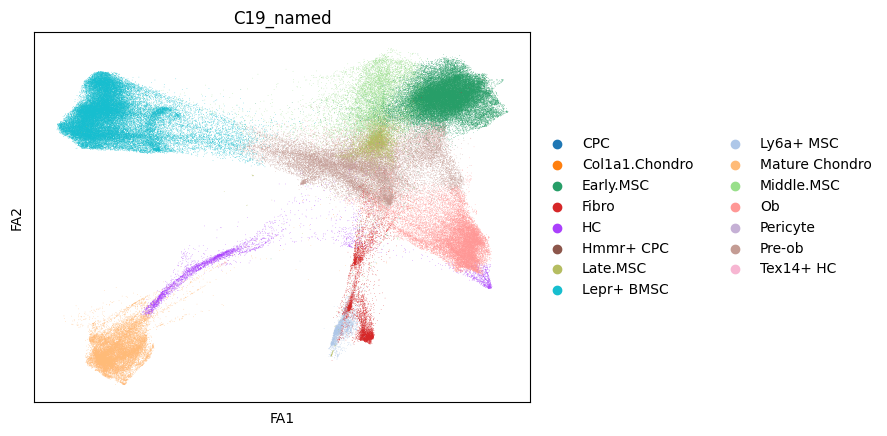

In [114]:
sc.pl.draw_graph(adata,color="C19_named")

In [86]:

def downsample_and_predict(reflatent_seurat,label ,scANVI, subsample_size):
    cell_ranks = reflatent_seurat.obs[label].cat.categories
    downsampled_cells = []

    for cell_rank in cell_ranks:
        current_cells = np.where(reflatent_seurat.obs[label] == cell_rank)[0]
        if min(len(current_cells), subsample_size) < subsample_size:
            print(f"The current ident {cell_rank} is smaller than the sample size, adjust to the ident size")

        downsampled_cells.extend(np.random.choice(current_cells, size=min(len(current_cells), subsample_size), replace=False))

    downsample_seurat = reflatent_seurat[downsampled_cells,: ]

    # Prepare data for RandomForest
    X = downsample_seurat.obsm[scANVI]
    y = LabelEncoder().fit_transform(downsample_seurat.obs[label])

    # Train a RandomForest classifier
    rf_model = RandomForestClassifier()
    rf_model.fit(X, y)

    # Get the class probabilities
    class_probs = rf_model.predict_proba(X)
    class_labels = rf_model.classes_

    # Create a DataFrame from the class probabilities
    votes = pd.DataFrame(data=class_probs, columns=class_labels)
    votes['ident'] = downsample_seurat.obs[label].values

    # Calculate class probabilities per cluster
    summary = votes.groupby('ident').mean()

    # Normalize the summary matrix
    summary = summary.divide(summary.max(axis=1), axis=0).fillna(0)
    np.fill_diagonal(summary.values, 0)
    summary.columns=summary.index.values


    return summary


In [265]:
adata.obs["dpt_bin"]=adata.obs["dpt_bin"].astype("int")

In [266]:
dpt_lineage_bin=dpt_lineage*np.array(adata.obs["dpt_bin"]).reshape(-1,1)

In [268]:
np.tile(dpt_lineage_bin.index, 4)

array(['Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0', ...,
       'TTTGACTTCTTGGGCG-1_5-1-2', 'TTTGGAGCAGCGACAA-1_5-1-2',
       'TTTGGTTCACTACTTT-1_5-1-2'], dtype=object)

In [269]:
dpt_lineage_bin = dpt_lineage_bin.replace(0, np.nan)



In [270]:
dpt_lineage_long= pd.concat([dpt_lineage_bin["lineage_chondro"], dpt_lineage_bin["lineage_laFibro"],
                             dpt_lineage_bin["lineage_lepr"],dpt_lineage_bin["lineage_mesenchyme"]], ignore_index=True)
lineage=np.repeat(["chondro","Fibro","Lepr","Mesenchyme"], 166204)
dict={'dpt_bin': dpt_lineage_long, 'lineage': lineage}
dpt_lineage_df=pd.DataFrame(data=dict)
dpt_lineage_df.index=np.tile(dpt_lineage_bin.index, 4)
dpt_lineage_df=dpt_lineage_df.dropna()

In [271]:
dpt_lineage_df["dpt_lineage"]=dpt_lineage_df['lineage']+dpt_lineage_df['dpt_bin'].astype(str)  

In [273]:
newAdata=adata[dpt_lineage_df.index,:]

In [274]:
newAdata.obs["dpt_lineage"]=dpt_lineage_df["dpt_lineage"]

/tmp/ipykernel_1468539/2443877582.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  newAdata.obs["dpt_lineage"]=dpt_lineage_df["dpt_lineage"]
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [275]:
newAdata.obs["dpt_lineage"]=newAdata.obs["dpt_lineage"].astype("category")

In [276]:
predictDF=downsample_and_predict(newAdata,"dpt_lineage" ,"X_scANVI",subsample_size=1000)

The current ident Fibro1.0 is smaller than the sample size, adjust to the ident size
The current ident Fibro6.0 is smaller than the sample size, adjust to the ident size
The current ident Fibro7.0 is smaller than the sample size, adjust to the ident size
The current ident Fibro8.0 is smaller than the sample size, adjust to the ident size
The current ident Lepr11.0 is smaller than the sample size, adjust to the ident size
The current ident Lepr8.0 is smaller than the sample size, adjust to the ident size
The current ident Mesenchyme10.0 is smaller than the sample size, adjust to the ident size
The current ident Mesenchyme7.0 is smaller than the sample size, adjust to the ident size
The current ident Mesenchyme8.0 is smaller than the sample size, adjust to the ident size
The current ident chondro10.0 is smaller than the sample size, adjust to the ident size
The current ident chondro11.0 is smaller than the sample size, adjust to the ident size
The current ident chondro4.0 is smaller than

In [277]:
predictDF.columns

CategoricalIndex(['Fibro1.0', 'Fibro10.0', 'Fibro2.0', 'Fibro3.0', 'Fibro4.0',
                  'Fibro5.0', 'Fibro6.0', 'Fibro7.0', 'Fibro8.0', 'Fibro9.0',
                  'Lepr1.0', 'Lepr10.0', 'Lepr11.0', 'Lepr2.0', 'Lepr3.0',
                  'Lepr4.0', 'Lepr5.0', 'Lepr6.0', 'Lepr7.0', 'Lepr8.0',
                  'Lepr9.0', 'Mesenchyme1.0', 'Mesenchyme10.0',
                  'Mesenchyme2.0', 'Mesenchyme3.0', 'Mesenchyme4.0',
                  'Mesenchyme5.0', 'Mesenchyme6.0', 'Mesenchyme7.0',
                  'Mesenchyme8.0', 'Mesenchyme9.0', 'chondro1.0',
                  'chondro10.0', 'chondro11.0', 'chondro2.0', 'chondro3.0',
                  'chondro4.0', 'chondro5.0', 'chondro6.0', 'chondro7.0',
                  'chondro8.0', 'chondro9.0'],
                 categories=['Fibro1.0', 'Fibro10.0', 'Fibro2.0', 'Fibro3.0', ..., 'chondro6.0', 'chondro7.0', 'chondro8.0', 'chondro9.0'], ordered=False, dtype='category')

In [278]:

lepr_column=list(reversed(['Lepr1.0', 'Lepr2.0', 'Lepr3.0', 'Lepr4.0', 'Lepr5.0',
                  'Lepr6.0', 'Lepr7.0', 'Lepr8.0', 'Lepr9.0','Lepr10.0']))
mes_column=list(reversed([ 'Mesenchyme1.0','Mesenchyme2.0', 'Mesenchyme3.0', 'Mesenchyme4.0', 'Mesenchyme5.0',
                  'Mesenchyme6.0', 'Mesenchyme7.0', 'Mesenchyme8.0',
                  'Mesenchyme9.0','Mesenchyme10.0']))
chondro_column=list(reversed([ 'chondro1.0',  'chondro2.0',
                  'chondro3.0', 'chondro4.0', 'chondro5.0', 'chondro6.0',
                  'chondro7.0', 'chondro8.0', 'chondro9.0','chondro10.0']))
fibro_column=list(reversed(['Fibro1.0', 'Fibro2.0', 'Fibro3.0', 'Fibro4.0', 'Fibro5.0',
                  'Fibro6.0', 'Fibro7.0', 'Fibro8.0', 'Fibro9.0','Fibro10.0']))

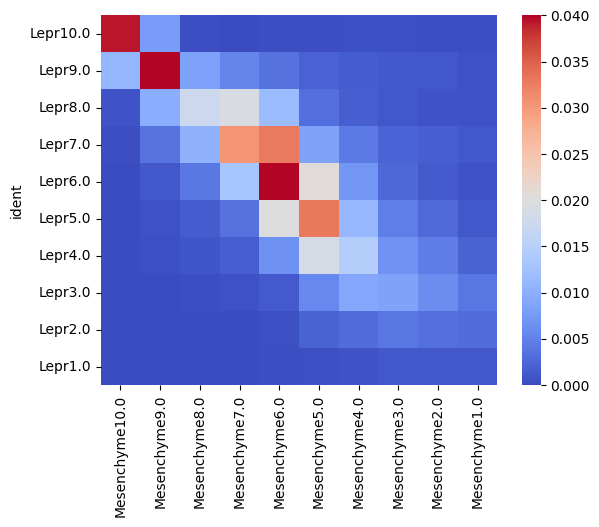

In [289]:
sns.heatmap(predictDF.loc[lepr_column,mes_column], annot=False, cmap='coolwarm',vmax=0.04)
plt.savefig("../result/10.30_lineage_draw/lepr_mes_plot_2.pdf",bbox_inches='tight')

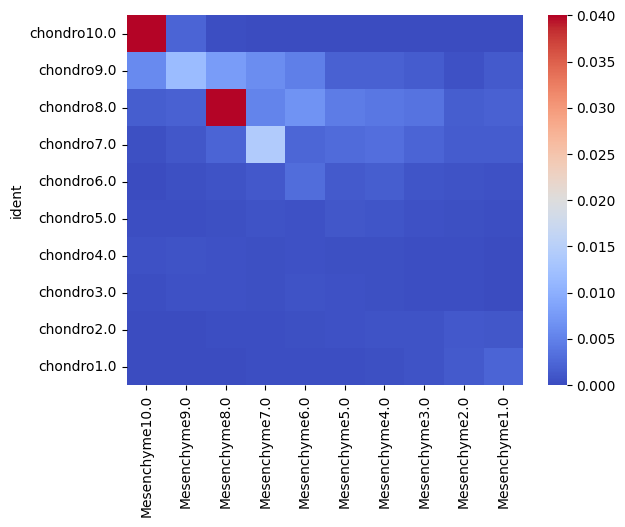

In [294]:
sns.heatmap(predictDF.loc[chondro_column,mes_column], annot=False, cmap='coolwarm',vmax=0.04)
plt.savefig("../result/10.30_lineage_draw//chondro_mes_plot_2.pdf",bbox_inches='tight')

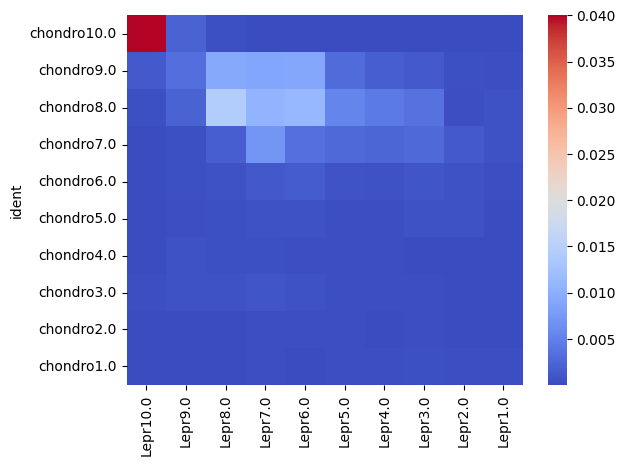

In [291]:
sns.heatmap(predictDF.loc[chondro_column,lepr_column], annot=False, cmap='coolwarm',vmax=0.04)
plt.savefig("../result/10.30_lineage_draw//chondro_lepr_plot_2.pdf",bbox_inches='tight')

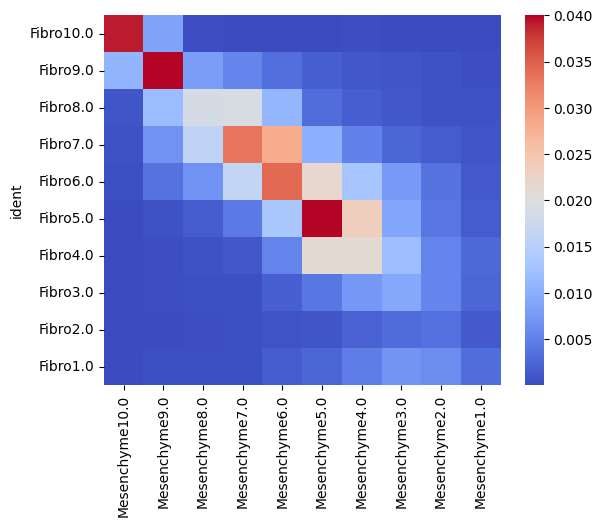

In [292]:
sns.heatmap(predictDF.loc[fibro_column,mes_column], annot=False, cmap='coolwarm',vmax=0.04)
plt.savefig("../result/10.30_lineage_draw/fibro_mes_plot_2.pdf",bbox_inches='tight')

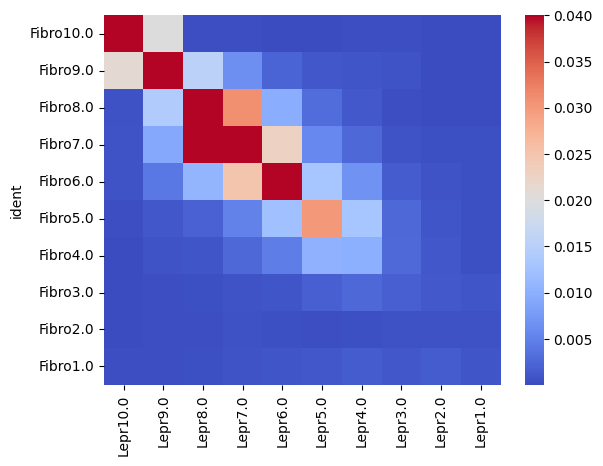

In [293]:
sns.heatmap(predictDF.loc[fibro_column,lepr_column], annot=False, cmap='coolwarm',vmax=0.04)
plt.savefig("../result/10.30_lineage_draw//fibro_lepr_plot_2.pdf",bbox_inches='tight')

In [311]:
predictDF.to_csv("../result/10.30_lineage_draw/10.30_predictDf_2.csv")

In [297]:
diagonal_ = np.diag(predictDF.loc[fibro_column,lepr_column])

In [299]:
diagonal_mes_lepr = np.diag(predictDF.loc[mes_column,lepr_column])
diagonal_mes_chondro = np.diag(predictDF.loc[mes_column,chondro_column])
diagonal_mes_fibro = np.diag(predictDF.loc[mes_column,fibro_column])
diagonal_mes_df = pd.DataFrame({
    'Fibro': diagonal_mes_fibro,
    'Lepr': diagonal_mes_lepr,
    'Chondro': diagonal_mes_chondro
})


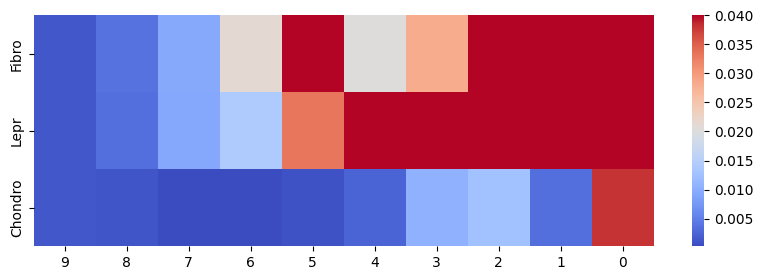

In [314]:
fig, ax = plt.subplots(figsize=(10, 3)) 
sns.heatmap(diagonal_mes_df.T.iloc[:, ::-1], annot=False, cmap='coolwarm',vmax=0.04,)
plt.savefig("../result/10.30_lineage_draw//diagonal_mes_df.pdf",bbox_inches='tight')
plt.show()

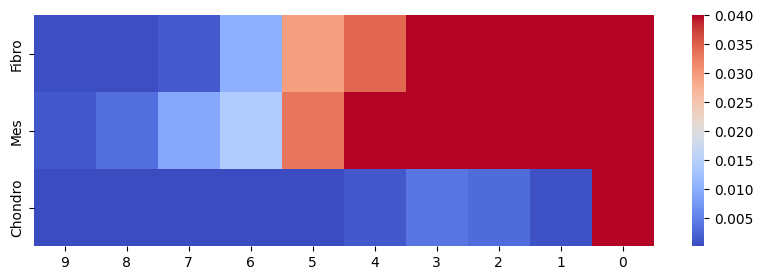

In [315]:
diagonal_mes_lepr = np.diag(predictDF.loc[mes_column,lepr_column])
diagonal_lepr_chondro = np.diag(predictDF.loc[lepr_column,chondro_column])
diagonal_lepr_fibro = np.diag(predictDF.loc[lepr_column,fibro_column])
diagonal_lepr_df = pd.DataFrame({
    'Fibro': diagonal_lepr_fibro,
    'Mes': diagonal_mes_lepr,
    'Chondro': diagonal_lepr_chondro
})
fig, ax = plt.subplots(figsize=(10, 3)) 
sns.heatmap(diagonal_lepr_df.T.iloc[:, ::-1], annot=False, cmap='coolwarm',vmax=0.04,)
plt.savefig("../result/10.30_lineage_draw/diagonal_lepr_df.pdf",bbox_inches='tight')
plt.show()

In [318]:
dpt_lineage_df.to_csv("../../important_processed_data/11.4_dpt_bin_df.csv")

In [97]:
adata2=sc.read("../../important_processed_data/6.18_dpt_wt_sub.h5ad")

In [183]:
adata.obs["dpt_bin"]=adata.obs["dpt_bin"].astype("str")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


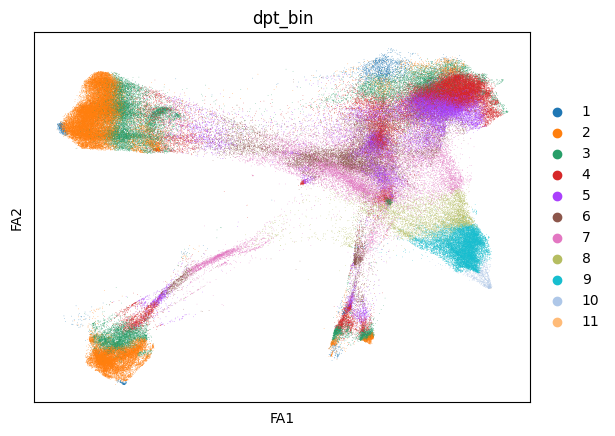

In [185]:
sc.pl.draw_graph(adata,color="dpt_bin")

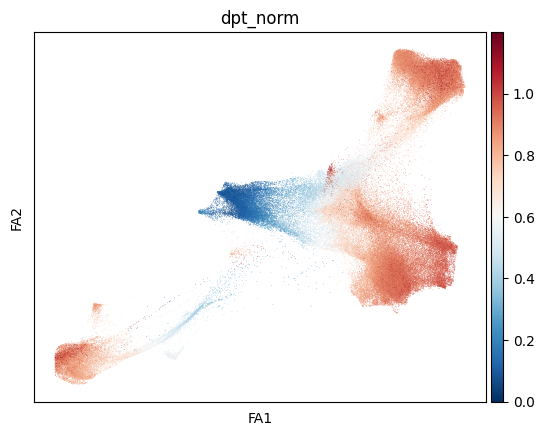

In [103]:
sc.pl.draw_graph(adata2,color=["dpt_norm"],cmap="RdBu_r")

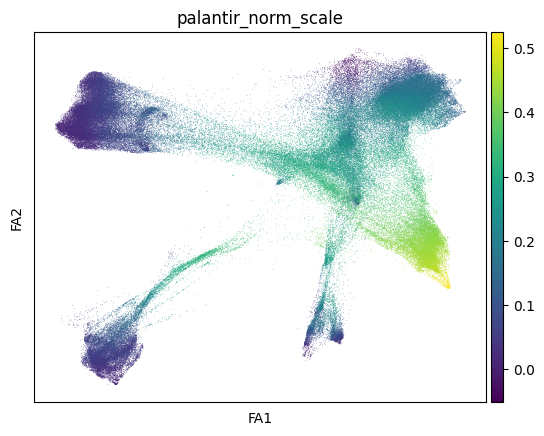

In [172]:
sc.pl.draw_graph(adata,color=["palantir_norm_scale"])

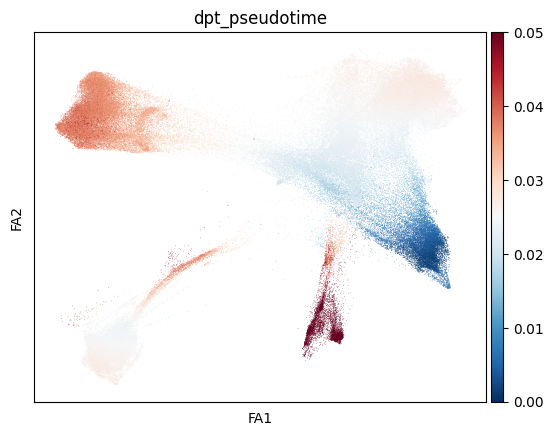

In [107]:
sc.pl.draw_graph(adata,color=["dpt_pseudotime"],cmap="RdBu_r",vmax=0.05)

In [316]:
dpt_lineage

lineage_chondro  \
Unnamed: 0                                                      
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0            False   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0            False   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0            False   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0            False   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0            False   
...                                                       ...   
TTTGACTGTATTTCCT-1_5-1-2                                False   
TTTGACTGTTGCATTG-1_5-1-2                                False   
TTTGACTTCTTGGGCG-1_5-1-2                                 True   
TTTGGAGCAGCGACAA-1_5-1-2                                False   
TTTGGTTCACTACTTT-1_5-1-2                                False   

                                              lineage_laFibro  lineage_lepr  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0            False         False   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0            False         False   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0            False         False   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0            False         False   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0            False         False   
...                                                       ...           ...   
TTTGACTGTATTTCCT-1_5-1-2                                False          True   
TTTGACTGTTGCATTG-1_5-1-2                                 True         False   
TTTGACTTCTTGGGCG-1_5-1-2                                False         False   
TTTGGAGCAGCGACAA-1_5-1-2                                 True          True   
TTTGGTTCACTACTTT-1_5-1-2                                 True          True   

                                              lineage_mesenchyme  
Unnamed: 0                                                        
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                True  
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                True  
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                True  
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0                True  
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0                True  
...                                                          ...  
TTTGACTGTATTTCCT-1_5-1-2                                   False  
TTTGACTGTTGCATTG-1_5-1-2                                   False  
TTTGACTTCTTGGGCG-1_5-1-2                                   False  
TTTGGAGCAGCGACAA-1_5-1-2                                   False  
TTTGGTTCACTACTTT-1_5-1-2                                   False  

[166204 rows x 4 columns]

In [317]:
dpt_lineage.to_csv('../../important_processed_data/11.2_dpt_lineage_infer.csv')

In [7]:
adata

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

(array([ 355.,  100.,  140.,  152.,  148.,  170.,  187.,  215.,  194.,
         405., 1310., 4629., 4727., 4453., 3192., 6316., 5483., 2514.,
        5235., 4900., 4865., 4319., 2268., 1328., 1453., 2114., 1804.,
        1658., 1706., 2329., 2430., 2350., 1854., 1957., 2055., 2596.,
        4728., 3421., 3671., 2687., 2074., 1742., 2234., 2642., 2789.,
        2884., 2332., 2048., 1974., 1625., 1313., 1188., 1119., 1268.,
        1473., 1616., 1603., 1521., 1358., 1269., 1490., 3218., 2071.,
        1775., 1230., 1438., 1366.,  698.,  823.,  615.,  381.,  619.,
         471.,  353.,  450.,  611.,  779.,  658.,  618.,  704., 1511.,
         646., 2069., 1330., 2341.,  943., 1728.,  937.,  711.,  353.,
         150.,   50.,   58.,   70.,   81.,   77.,   83.,   46.,   84.,
          78.]),
 array([-0.05      , -0.04425   , -0.03849999, -0.03274999, -0.02699998,
        -0.02124998, -0.01549997, -0.00974997, -0.00399996,  0.00175004,
         0.00750005,  0.01325005,  0.01900006,  0.024750

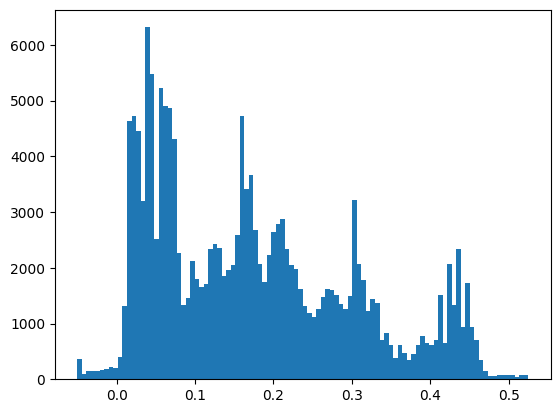

In [146]:
plt.hist(dptValue,bins=100)

In [147]:
adata.obs["palantir_norm_scale"]=dptValue

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


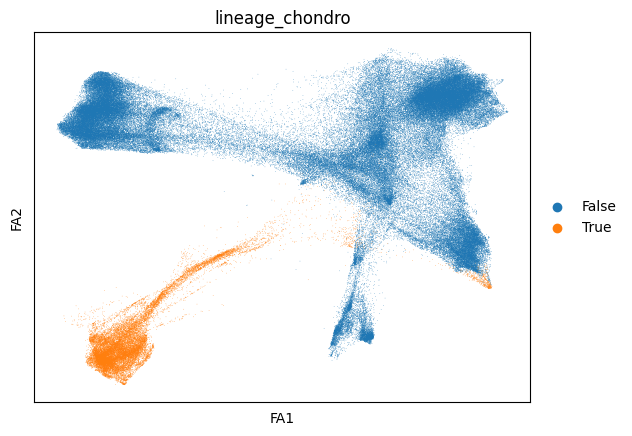

In [171]:
sc.pl.draw_graph(adata,color="lineage_chondro")

In [201]:
adata.X=adata.layers["counts"]

In [194]:
adata.obs["dpt_bin"].to_csv("../../temp_data/10.31_dpt_bin_16w.csv")

In [275]:
adata_bk.obs["dpt_bin"].to_csv("../../temp_data/10.31_dpt_bin_16w.csv")

In [197]:
dpt_lineage_df["dpt_lineage"]

ChondroOsteo_Long_AAACCCAAGGAGAATG-1-1                                 chondro7.0
ChondroOsteo_Long_AAACCCACAAGTGTCT-1-1                                 chondro7.0
ChondroOsteo_Long_AAACCCACACGCTGTG-1-1                                 chondro6.0
ChondroOsteo_Long_AAACGAAAGGTGCTGA-1-1                                 chondro7.0
ChondroOsteo_Long_AAACGAAGTACCTATG-1-1                                 chondro7.0
                                                                        ...      
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGCATAACAGA-1_3-1    Mesenchyme5.0
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCCATATGG-1_3-1    Mesenchyme5.0
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGACCATA-1_3-1    Mesenchyme3.0
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGTTGTAG-1_3-1    Mesenchyme5.0
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCTGCGGCA-1_3-1    Mesenchyme5.0
Name: dpt_lineage, Length: 181224, dtype: object

In [198]:
dpt_lineage_df["dpt_lineage"].to_csv("../../temp_data/10.31_dpt_bin_16w.csv")

In [321]:
pd.DataFrame(adata.obs["palantir_norm_scale_2"]).to_csv("../../temp_data/palantir_norm.csv")

In [322]:
adata

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le